In [48]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
from pandas_datareader import data

In [ ]:
from datetime import datetime

In [ ]:
from __future__ import division

In [ ]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [ ]:
end=datetime.now()

start=datetime(end.year-1,end.month,end.day)

In [ ]:
for stock in tech_list:
    globals()[stock]=data.DataReader(stock,'yahoo',start,end)

In [ ]:
AAPL.describe()

In [ ]:
AAPL.info()

In [ ]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

In [ ]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [ ]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

In [ ]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days',]].plot(subplots=False,figsize=(10,4))

In [ ]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

In [ ]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [ ]:
AAPL['Daily Return'].hist(bins=100)

In [28]:
closing_df=data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [29]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-09-07,155.816879,145.518997,297.686859,175.464493
2021-09-08,154.245667,144.883499,297.716583,176.274994
2021-09-09,153.211472,144.913498,294.781219,174.207993
2021-09-10,148.139893,141.921005,293.253998,173.457504
2021-09-13,148.716660,143.464996,294.523376,172.858505


In [30]:
tech_rets=closing_df.pct_change()

In [31]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-09-07,NaN,NaN,NaN,NaN
2021-09-08,-0.010084,-0.004367,0.000100,0.004619
2021-09-09,-0.006705,0.000207,-0.009860,-0.011726
2021-09-10,-0.033102,-0.020650,-0.005181,-0.004308
2021-09-13,0.003893,0.010879,0.004329,-0.003453


In [23]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

NameError: name 'tech_rets' is not defined

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


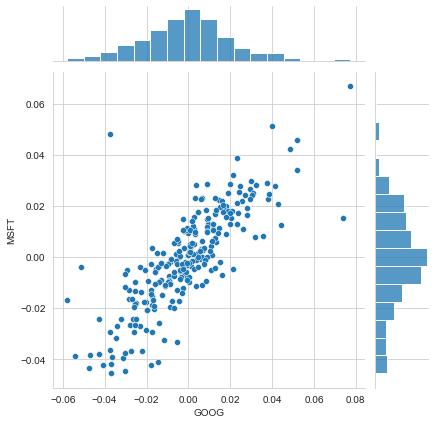

In [32]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [33]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-09-07,NaN,NaN,NaN,NaN
2021-09-08,-0.010084,-0.004367,0.000100,0.004619
2021-09-09,-0.006705,0.000207,-0.009860,-0.011726
2021-09-10,-0.033102,-0.020650,-0.005181,-0.004308
2021-09-13,0.003893,0.010879,0.004329,-0.003453


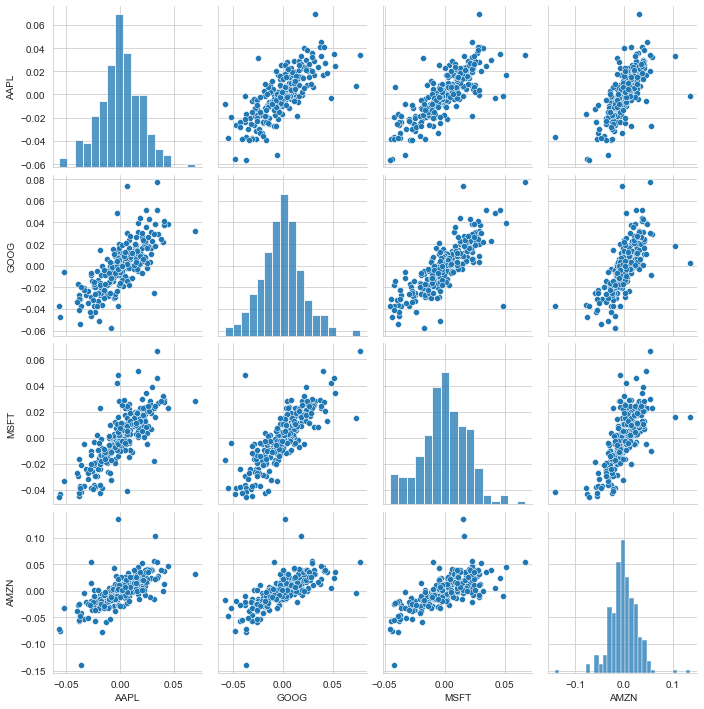

In [34]:
sns.pairplot(tech_rets.dropna())

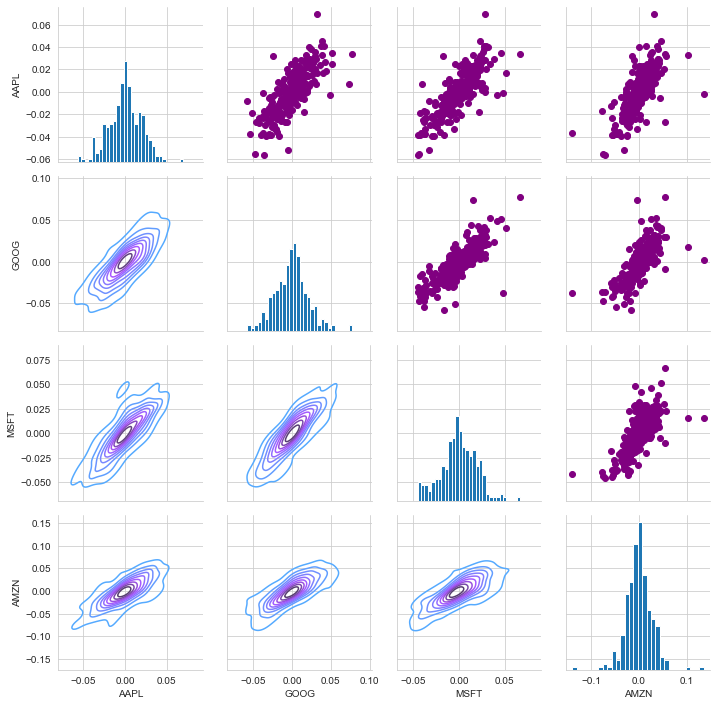

In [37]:
returns_fig=sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

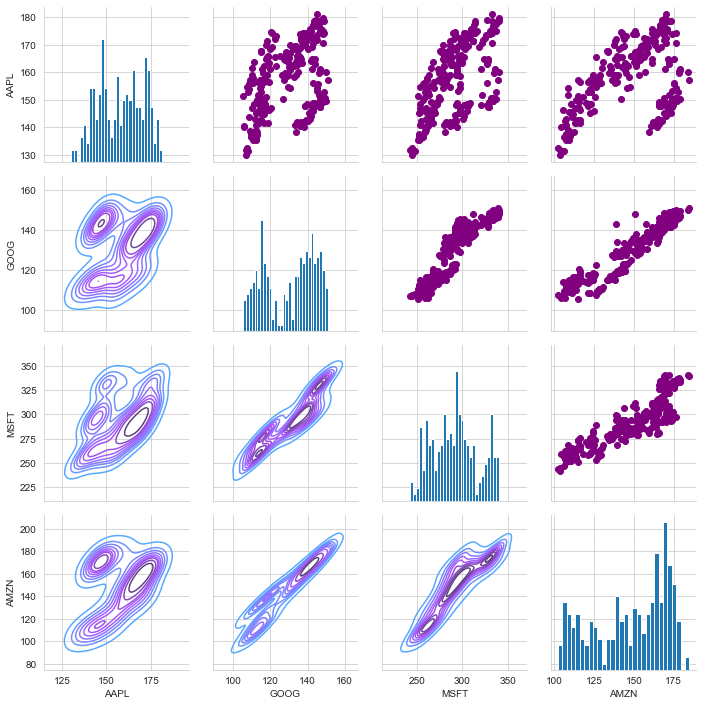

In [38]:
returns_fig=sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

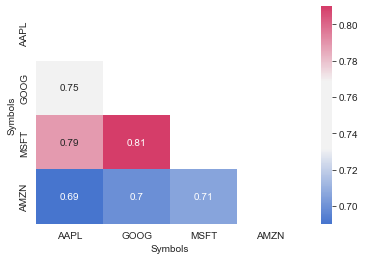

In [51]:
corr=tech_rets.dropna().corr()
mask=np.zeros_like(corr)

mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True,mask=mask)

#sns.heatmap(tech_rets.dropna(),annot=True)


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

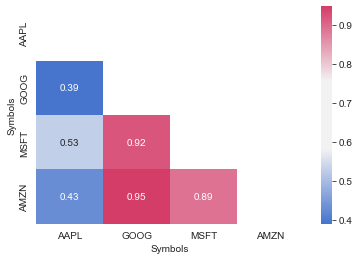

In [52]:
corr1=closing_df.dropna().corr()
mask1=np.zeros_like(corr1)

mask1[np.triu_indices_from(mask1)]=True
sns.heatmap(corr1,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True,mask=mask1)

In [53]:
rets=tech_rets.dropna()

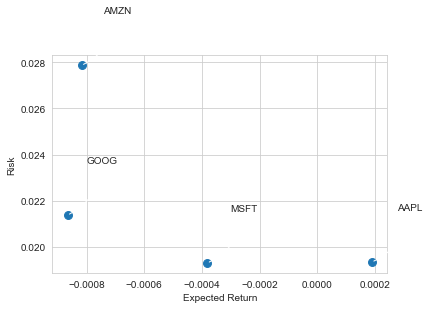

In [59]:
area=np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(50,50),
    textcoords='offset points',ha='right',va='bottom',
    arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

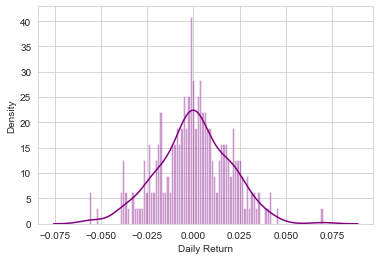

In [60]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [61]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-09-08,-0.010084,-0.004367,0.000100,0.004619
2021-09-09,-0.006705,0.000207,-0.009860,-0.011726
2021-09-10,-0.033102,-0.020650,-0.005181,-0.004308
2021-09-13,0.003893,0.010879,0.004329,-0.003453
2021-09-14,-0.009562,-0.000411,0.009428,-0.002074


In [62]:
rets['AAPL'].quantile(0.05)

-0.03314113351491693

In [63]:
days=365

dt=1/days

mu=rets.mean()['GOOG']

sigma=rets.std()['GOOG']

In [71]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price=np.zeros(days)
    price[0]=start_price
    
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return price

In [72]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-07,145.824005,144.541000,144.749496,145.518997,15170000.0,145.518997
2021-09-08,145.550995,144.199997,145.393494,144.883499,15486000.0,144.883499
2021-09-09,145.669495,144.434006,144.883499,144.913498,14798000.0,144.913498
2021-09-10,146.018997,141.741501,145.443497,141.921005,32896000.0,141.921005
2021-09-13,144.190994,142.282501,143.201004,143.464996,20176000.0,143.464996


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

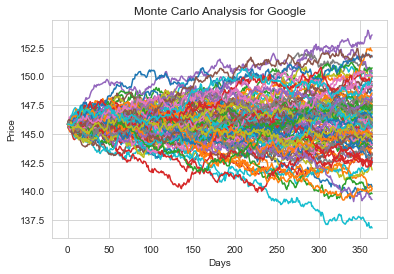

In [73]:
start_price=145.82

for run in range(100):
    
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [85]:
runs=10000

simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

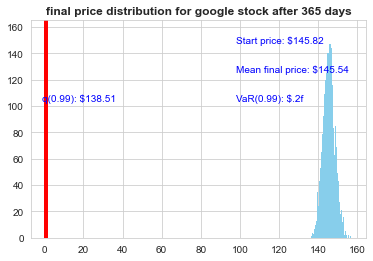

In [88]:
q=np.percentile(simulations,1)

plt.hist(simulations,bins=200,color = "skyblue", lw=0)

plt.figtext(0.6,0.8,s="Start price: $%.2f"%start_price,color='blue')


plt.figtext(0.6,0.7,"Mean final price: $%.2f"% simulations.mean(),color='blue')


plt.figtext(0.6,0.6,"VaR(0.99): $.2f"%(start_price-q),color='blue')

plt.figtext(0.15,0.6,"q(0.99): $%.2f"%q,color='blue')


plt.axvline(x=1,linewidth=4,color='r')


plt.title(u"final price distribution for google stock after %s days" %days,weight='bold');